In [2]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats

In [2]:
priors_dict = {
    "captive_time": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "div_time": scipy.stats.lognorm(s=0.7, loc=10000, scale=60000),
    "div_time_dom": scipy.stats.lognorm(s=0.5, loc=500, scale=3000),
    "div_time_scot": scipy.stats.lognorm(s=0.3, loc=0, scale=3000),
    "mig_rate_captive": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_rate_scot": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_length_scot": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "pop_size_captive": scipy.stats.lognorm(s=0.6, loc=0, scale=100),
    "pop_size_domestic_1": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "pop_size_lyb_1": scipy.stats.lognorm(s=1, loc=0, scale=20000),
    "pop_size_lyb_2": scipy.stats.lognorm(s=1.5, loc=5000, scale=100000),
    "pop_size_scot_1": scipy.stats.lognorm(s=1, loc=0, scale=4000),
    "pop_size_eu_1": scipy.stats.lognorm(s=1.3, loc=0, scale=20000),
    "pop_size_eu_2": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "mutation_rate": scipy.stats.lognorm(s=1, loc=0, scale=1e-8),
    "recombination_rate": scipy.stats.lognorm(s=0.5, loc=0.4e-8, scale=9e-9)
}

theta = []
for key, prior in priors_dict.items():
    theta.append(prior.rvs(100000))
theta = np.concatenate(theta, axis=0)
print(np.shape(theta))
theta = np.reshape(theta, (16,100000))
print(np.shape(theta))

(1600000,)
(16, 100000)


In [3]:
params = {
    "captive_time": {"bins" : [120,100], "lims" : [0, 100]},
    "div_time": {"bins" : [300,100], "lims" : [0, 300000]},
    "div_time_dom": {"bins" : [100,100], "lims" : [500, 11000]},
    "div_time_scot": {"bins" : [100,100], "lims" : [1000, 7000]},
    "mig_rate_captive": {"bins" : [300,150], "lims" : [0, 0.4]},
    "mig_rate_scot": {"bins" : [500,50], "lims" : [0, 0.3]},
    "mig_length_scot": {"bins" : [200,100], "lims" : [0, 80]},
    "pop_size_captive": {"bins" : [100,100], "lims" : [0, 500]},
    "pop_size_domestic_1": {"bins" : [700,50], "lims" : [0, 500000]},
    "pop_size_lyb_1": {"bins" : [500,30], "lims" : [0, 100000]},
    "pop_size_lyb_2": {"bins" : [1500,100], "lims" : [0, 750000]},
    "pop_size_scot_1": {"bins" : [400,200], "lims" : [0, 30000]},
    "pop_size_eu_1": {"bins" : [800,800], "lims" : [0, 150000]},
    "pop_size_eu_2": {"bins" : [300,100], "lims" : [0, 250000]},
    "mutation_rate": {"bins" : [200,100], "lims" : [0, 0.6e-7]},
    "recombination_rate": {"bins" : [300,100], "lims" : [0.5e-8, 3.5e-8]}
         }


names = ["Captive Time",
        "$F. lybica$ Divergence",
        "$F. catus$ Divergence",
        "Scottish Divergence",
        "Captive Migration Rate",
        "Wild Migration Rate",
        "Wild Migration Length",
        "Captive Population",
        "$F. catus$ Population",
        "$F. lybica$ Population",
        "Ancestral $F. lybica$ Population",
        "Scottish Population",
        "$F. silvestris$ Population",
        "Ancestral  $F. silvestris$ Population",
        "Mutation Rate",
        "Recombination Rate"
        ]

In [4]:
theta_2 = pd.read_csv("./tr2_100k.csv")
print(np.shape(theta_2))
theta_2.columns=names
theta_2

(100000, 16)


,Captive Time,$F. lybica$ Divergence,$F. catus$ Divergence,Scottish Divergence,Captive Migration Rate,Wild Migration Rate,Wild Migration Length,Captive Population,$F. catus$ Population,$F. lybica$ Population,Ancestral $F. lybica$ Population,Scottish Population,$F. silvestris$ Population,Ancestral $F. silvestris$ Population,Mutation Rate,Recombination Rate
0,25.467922,55456.400,3257.0288,3940.8060,0.041539,0.089098,9.882033,171.059710,182497.120,3017.0652,58214.703,2260.3767,366284.7200,24082.107,2.037025e-08,1.025613e-08
1,41.054035,87020.984,4153.8867,3060.4038,0.047339,0.024366,19.837362,129.772110,201611.700,4412.5806,92642.200,2796.1077,12396.3810,34767.586,1.135758e-08,1.293367e-08
2,10.674136,127493.280,2478.7720,2191.6072,0.102688,0.150660,2.760895,48.531000,123117.380,2837.8535,151159.770,2526.2998,15573.3530,44703.133,7.797063e-09,1.409547e-08
3,21.135572,87462.910,4356.6274,1682.8278,0.026208,0.051196,8.943687,97.512330,424450.900,4601.6733,105329.305,2863.1484,4140.4404,47968.234,1.001780e-08,2.061724e-08
4,17.829200,71924.460,5087.3440,2965.9863,0.040559,0.036743,15.770654,92.833206,145860.420,4418.3800,50444.633,2903.6345,14677.8390,35786.580,1.295938e-08,1.264467e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,103.547370,87701.720,4300.2430,3448.1807,0.047831,0.037350,18.449707,117.766045,155248.690,4655.2370,89796.195,3245.5874,29835.9040,36537.457,1.081475e-08,1.152928e-08
99996,32.001217,72517.390,3942.8630,4039.2456,0.042668,0.040360,12.530746,108.915240,125733.945,3722.6846,61454.200,3805.5586,25827.9630,36778.215,1.346714e-08,1.681520e-08
99997,62.027670,89742.650,5685.0645,3697.6274,0.050603,0.039042,12.131549,96.575560,258711.550,5579.5280,80063.050,5915.8555,12882.4540,45823.050,1.018255e-08,9.035085e-09
99998,11.862362,72154.350,5948.4000,2434.2947,0.007243,0.049326,10.874724,211.921940,164442.600,6074.4880,67019.760,2164.2688,6477.3620,31575.443,1.450070e-08,1.218269e-08


In [5]:
data = theta_2.iloc[:,[1,2,5,6,9,10,13,14]]
data

,$F. lybica$ Divergence,$F. catus$ Divergence,Wild Migration Rate,Wild Migration Length,$F. lybica$ Population,Ancestral $F. lybica$ Population,Ancestral $F. silvestris$ Population,Mutation Rate
0,55456.400,3257.0288,0.089098,9.882033,3017.0652,58214.703,24082.107,2.037025e-08
1,87020.984,4153.8867,0.024366,19.837362,4412.5806,92642.200,34767.586,1.135758e-08
2,127493.280,2478.7720,0.150660,2.760895,2837.8535,151159.770,44703.133,7.797063e-09
3,87462.910,4356.6274,0.051196,8.943687,4601.6733,105329.305,47968.234,1.001780e-08
4,71924.460,5087.3440,0.036743,15.770654,4418.3800,50444.633,35786.580,1.295938e-08
...,...,...,...,...,...,...,...,...
99995,87701.720,4300.2430,0.037350,18.449707,4655.2370,89796.195,36537.457,1.081475e-08
99996,72517.390,3942.8630,0.040360,12.530746,3722.6846,61454.200,36778.215,1.346714e-08
99997,89742.650,5685.0645,0.039042,12.131549,5579.5280,80063.050,45823.050,1.018255e-08
99998,72154.350,5948.4000,0.049326,10.874724,6074.4880,67019.760,31575.443,1.450070e-08


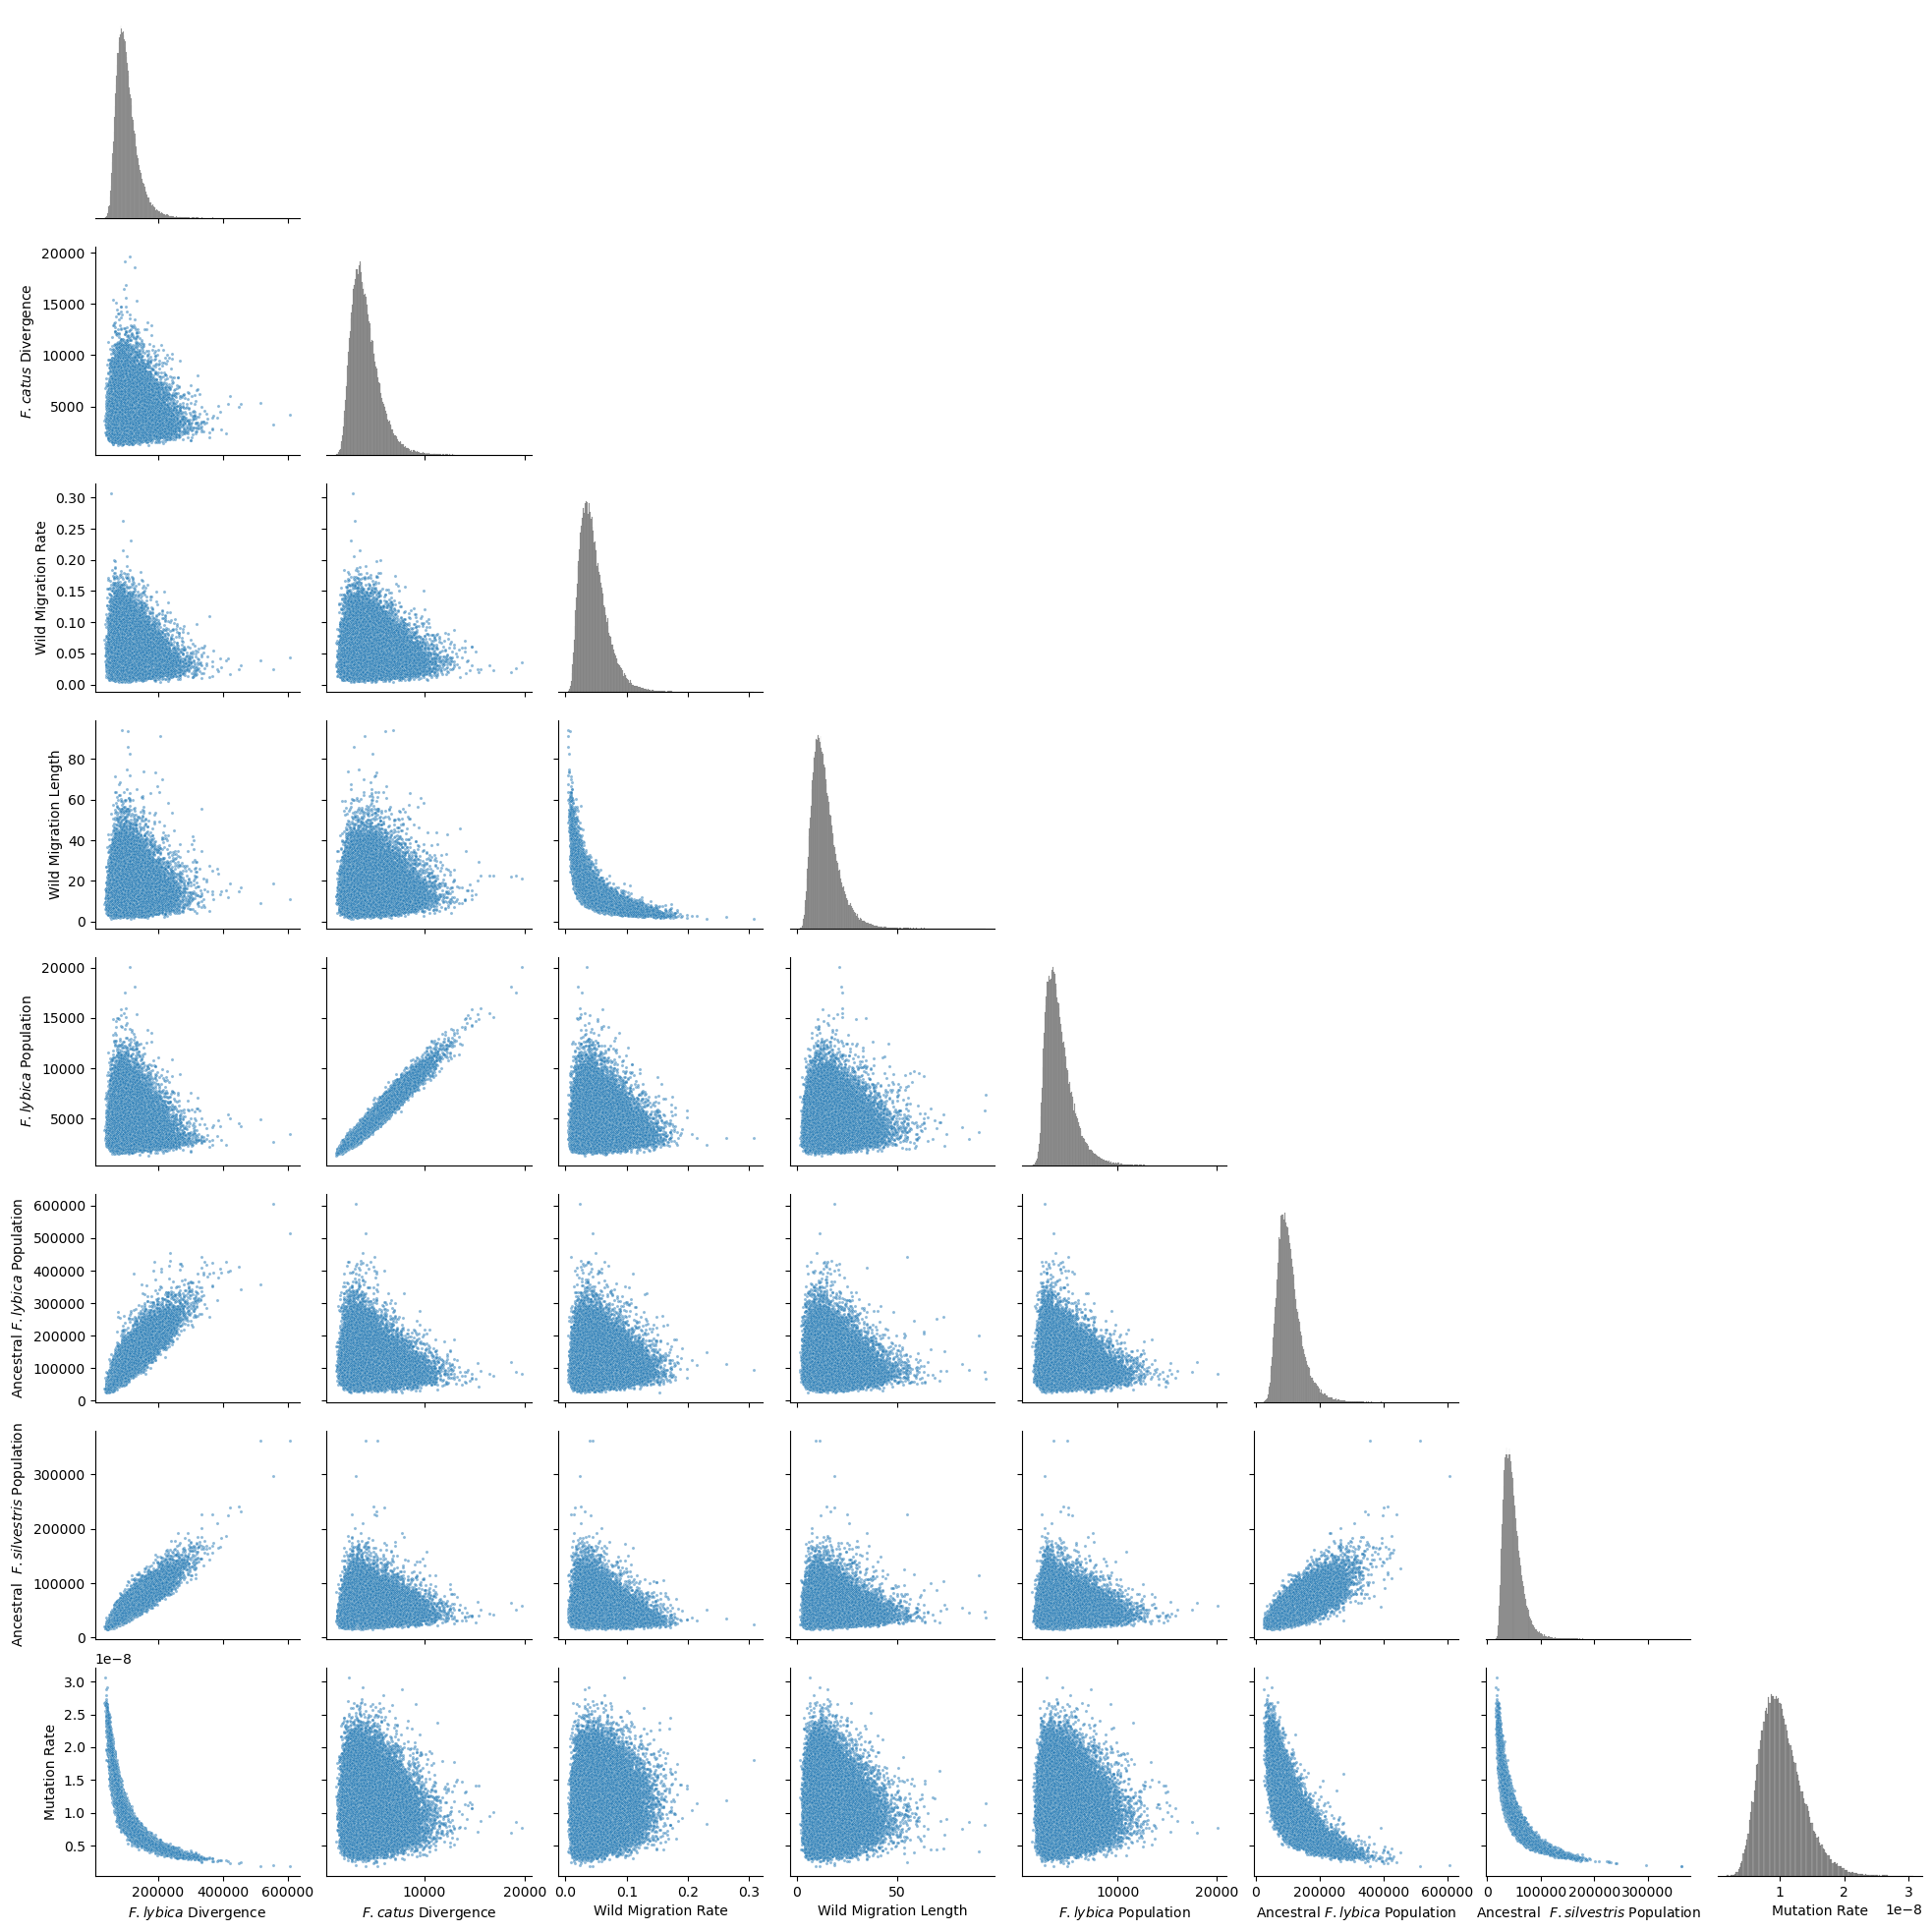

In [22]:
sns.pairplot(data, plot_kws={'alpha':0.5, 's':5},diag_kws={'color':'grey'}, corner=True)

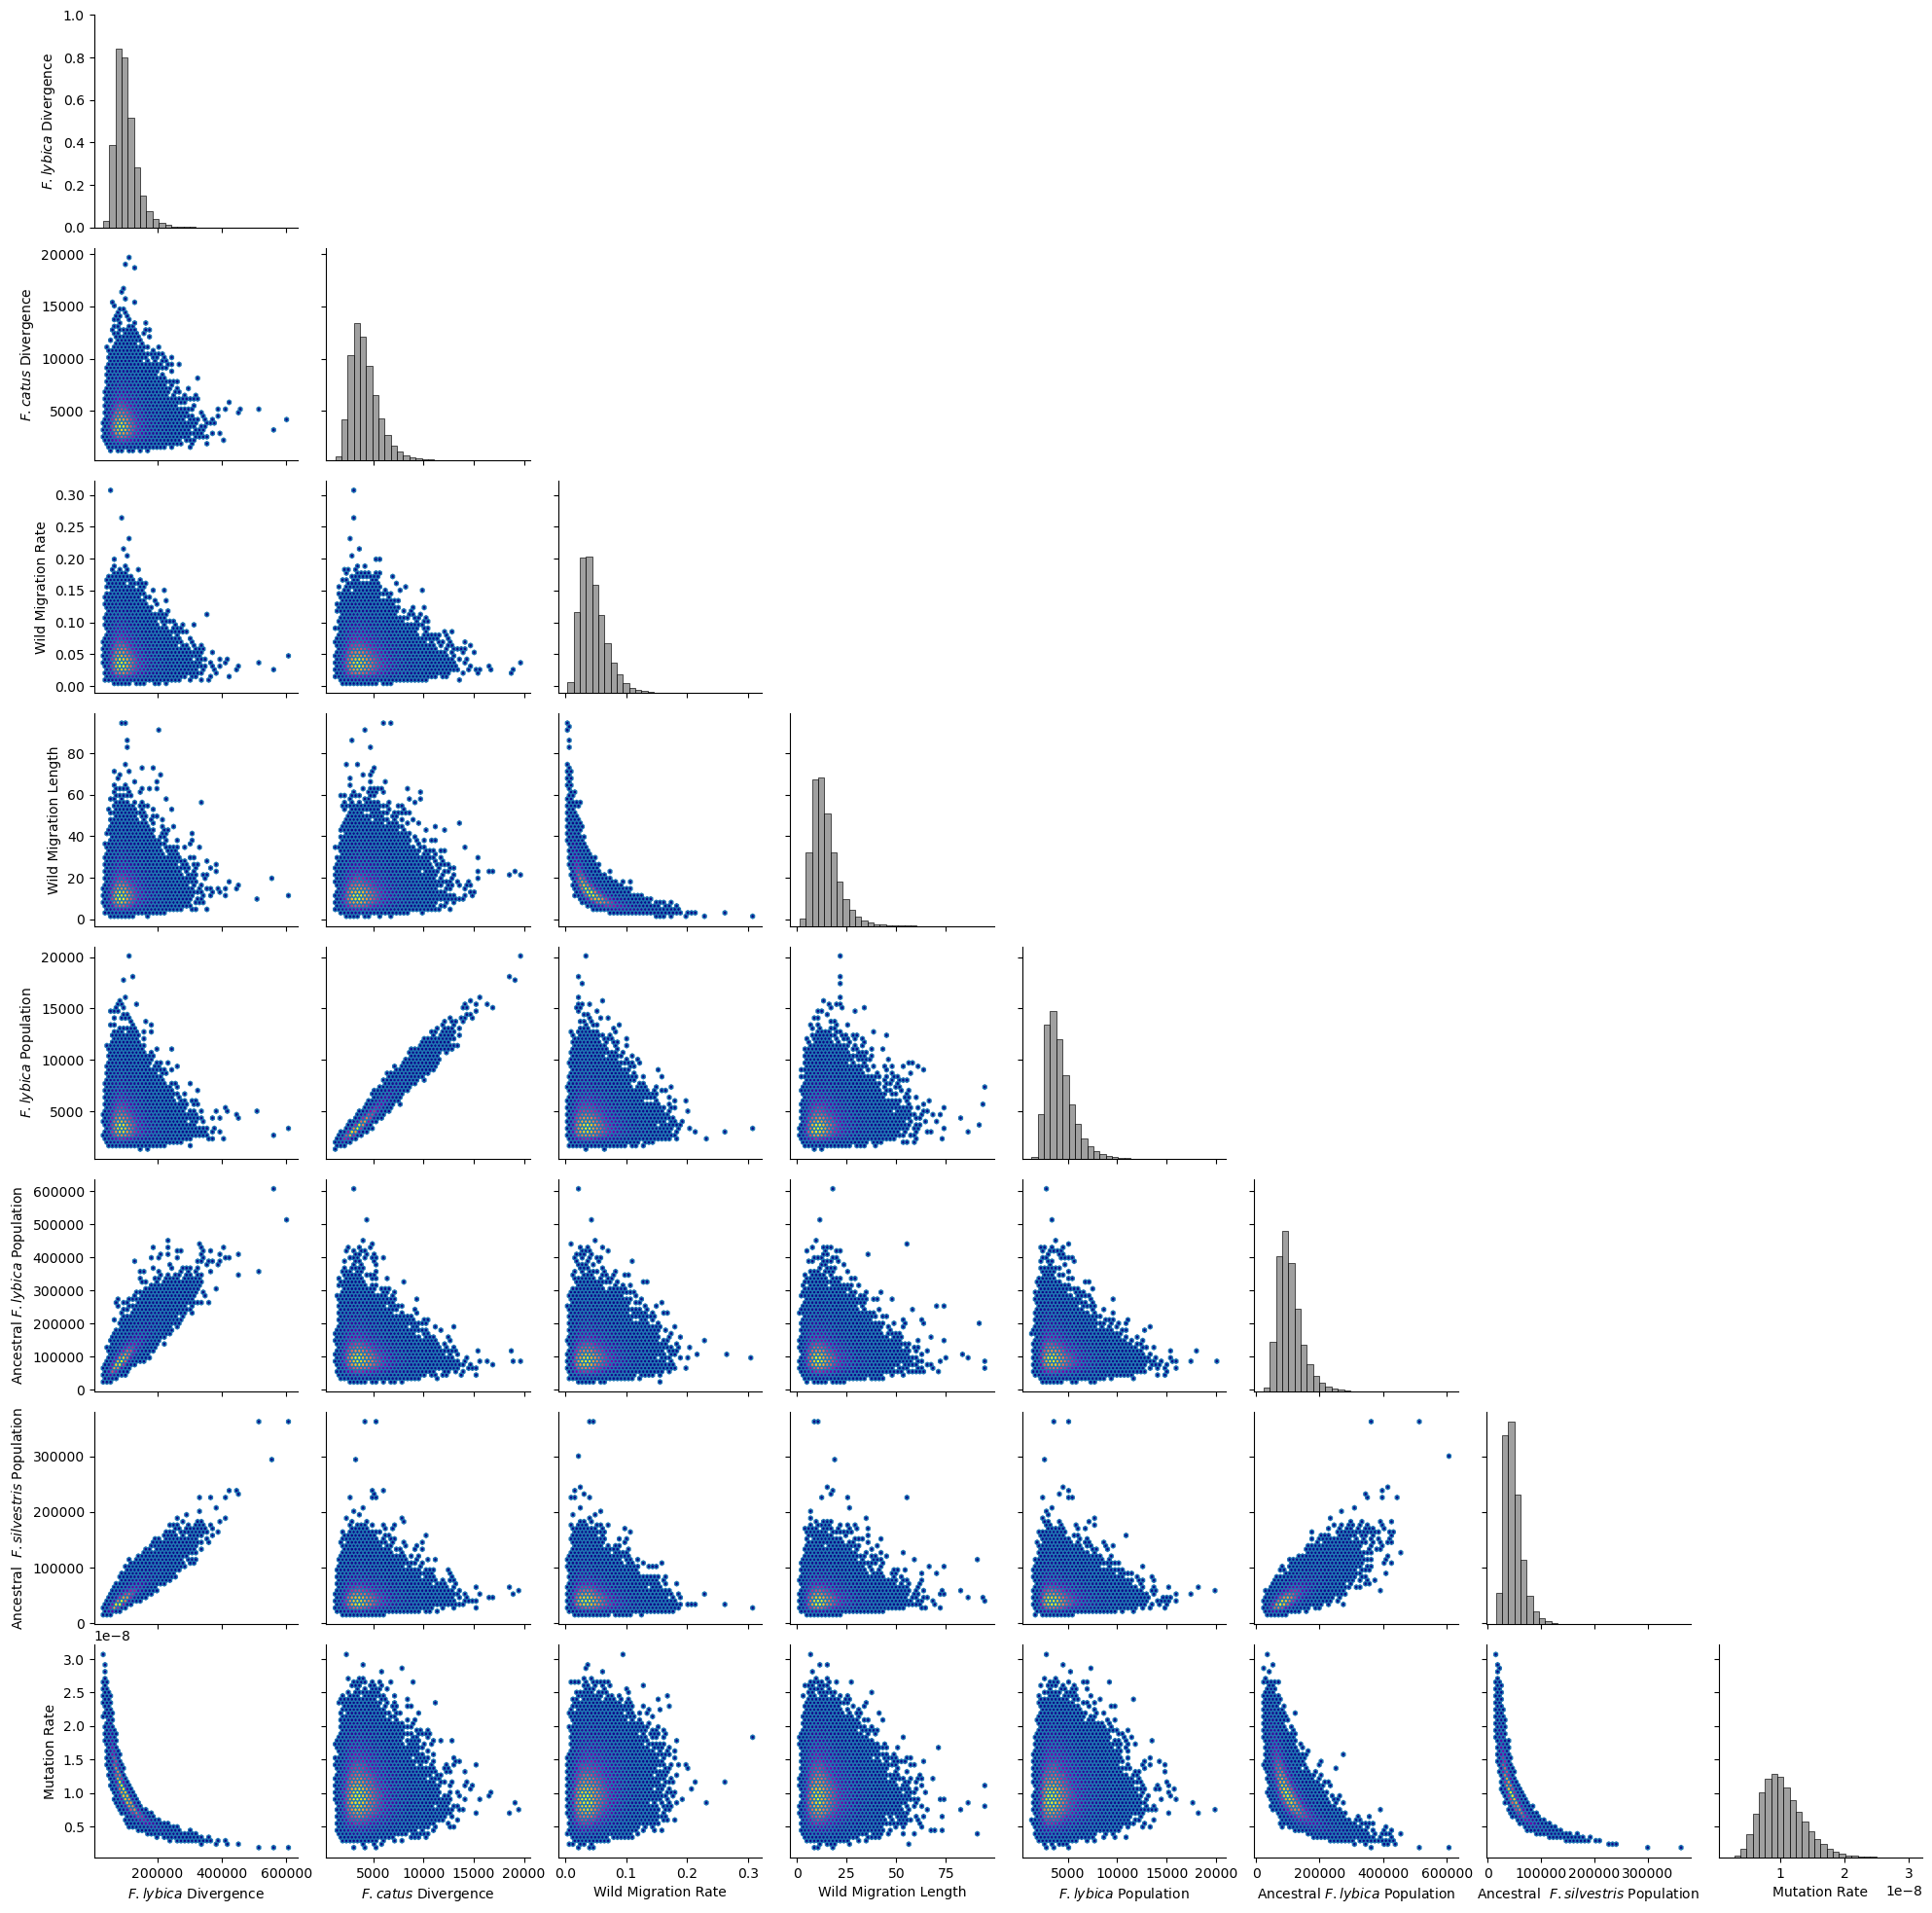

In [25]:
# Create the pairplot
g = sns.PairGrid(data)


# Map hexbin plots for both lower and upper triangles
g.map_lower(plt.hexbin, gridsize=50, cmap="plasma", mincnt=1)
#g.map_upper(plt.hexbin, gridsize=30, cmap="viridis", mincnt=1)

# Use KDE for diagonal (optional, for visualizing distribution)
g.map_diag(sns.histplot, kde=False, bins=30, color="gray")

for i in range(len(g.axes)):
    for j in range(len(g.axes)):
        if i < j:  # This condition hides the upper triangle
            g.axes[i, j].set_visible(False)

plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')  # Save with high resolution
plt.show()